# Logistic Regression

## Importing the libraries 

In [336]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Importing the dataset

In [337]:
dt = pd.read_csv("Social_Network_Ads.csv")
df = pd.DataFrame(dt)

## Splitting the dataset into the Training set and Test set

In [338]:
X_features = df.iloc[:,0:2]

In [339]:
Y_features = df.iloc[:,-1]

In [340]:
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_features, test_size = 0.25)

In [341]:
display(X_train)

,Age,EstimatedSalary
90,22,81000
245,51,146000
370,60,46000
304,40,60000
299,46,117000
...,...,...
308,36,125000
65,24,58000
187,33,41000
75,34,112000


In [342]:
display(X_test)

,Age,EstimatedSalary
333,40,65000
157,29,75000
359,42,54000
248,41,52000
33,28,44000
...,...,...
307,47,113000
352,42,90000
328,36,118000
27,47,30000


## Feature Scaling

In [343]:
scaler = StandardScaler()

In [344]:
X_train = scaler.fit_transform(X_train) 

In [345]:
X_test = scaler.transform(X_test)

## Training the Logistic Regression model on the Training set

In [346]:
clf = LogisticRegression().fit(X_train,Y_train)

## Predicting the Test set results

In [347]:
pred = clf.predict(X_test)

## Making the Confusion Matrix

In [348]:
con_matrix = confusion_matrix(Y_test, pred)

## Visualising the Training set results

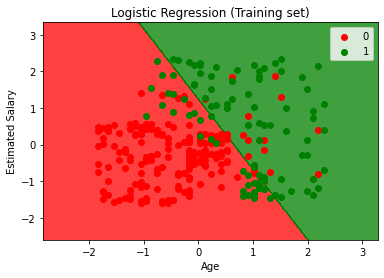

In [349]:
X1, X2 = np.meshgrid(np.arange(start = X_train[:, 0].min() - 1, stop = X_train[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train[:, 1].min() - 1, stop = X_train[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(Y_train)):
    plt.scatter(X_train[Y_train == j, 0], X_train[Y_train == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


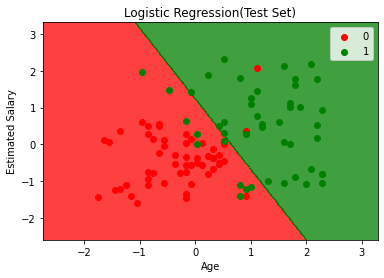

In [350]:
X1,X2 = np.meshgrid(np.arange(start =X_test[:, 0].min() -1, stop=X_test[:, 0].max()+1, step = 0.01), np.arange(start =X_test[:, 1].min() -1, stop=X_test[:, 1].max()+1, step =0.01))

plt.contourf(X1,X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, cmap = ListedColormap(('red','green')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(Y_test)):
     plt.scatter(X_test[Y_test==j,0], X_test[Y_test==j,1], c= ListedColormap(('red','green'))(i) ,label= j) 
        
plt.title('Logistic Regression(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()